In [1]:
import numpy as np
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import matplotlib as mpl

## member.csv

In [2]:
df_M= pd.read_csv("members_v3.csv")

In [3]:
df_M.shape

(3994018, 6)

In [4]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994018 entries, 0 to 3994017
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   city                    float64
 2   bd                      float64
 3   gender                  object 
 4   registered_via          float64
 5   registration_init_time  float64
dtypes: float64(4), object(2)
memory usage: 182.8+ MB


In [5]:
#check for duplicates
df_M.nunique() 

msno                      3994018
city                           21
bd                            330
gender                          2
registered_via                 18
registration_init_time       4781
dtype: int64

In [6]:
#check for missing value
df_M.isnull().sum()

msno                            0
city                            1
bd                              1
gender                    2581022
registered_via                  1
registration_init_time          1
dtype: int64

In [7]:
#Replace empty gender value as No Data
df_M.gender=df_M.gender.replace(np.nan,'No Data')

In [8]:
#Dropout the rest empty values
df_M=df_M.dropna()
df_M.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64

array([[<AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'bd'}>],
       [<AxesSubplot:title={'center':'registered_via'}>,
        <AxesSubplot:title={'center':'registration_init_time'}>]],
      dtype=object)

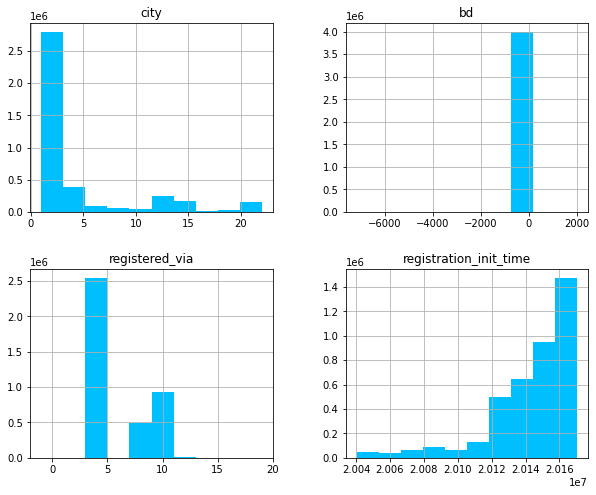

In [9]:
df_M.hist(color='deepskyblue',figsize=(10, 8))

In [10]:
#check age values
df_M.bd.describe()

count    3.994017e+06
mean     1.009990e+01
std      1.823360e+01
min     -7.168000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.200000e+01
max      2.011000e+03
Name: bd, dtype: float64

In [11]:
#select reasonable range out of age
mask1=df_M.bd<=100                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
mask2=df_M.bd>0 
df_bd=df_M[mask1&mask2].bd

In [12]:
df_M.bd.value_counts().head(30)
print('%% of Valid age values: %.5f%%'%(df_bd.count()/df_M.shape[0]))

% of Valid age values: 0.33714%


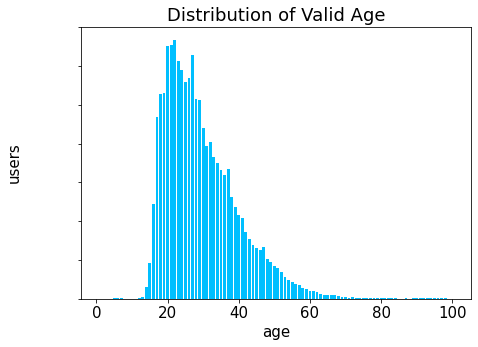

In [13]:
#Graphic:age in range 1-100
plt.figure(figsize=(7,5))
plt.rcParams['font.size']=15
plt.yticks(alpha=0)
plt.title('Distribution of Valid Age')
plt.xlabel('age')
plt.ylabel('users')
plt.bar(df_bd.value_counts().index.values,df_bd.value_counts(),color='deepskyblue')
df_M['bd']=df_bd

In [14]:
#grouping by age base on the Distribution
#connect to the database
conn=sqlite3.connect('db')
cursor=conn.cursor()
print('opened database successfully')

# CREATE member_table 
sqlstr='''CREATE TABLE IF NOT EXISTS member(NSNO TEXT NOT NULL) '''
cursor.execute(sqlstr)
conn.commit()
df_M.to_sql('member', con=conn, if_exists='replace')
print('member Records created successfully')

groupage='''Select msno,BD,GENDER,CITY,registered_via,
case 
when BD<18 then '18-'
when BD between 18 and 20 then '18-20'
when BD between 21 and 25 then '21-25'
when BD between 26 and 30 then '26-30'
when BD between 31 and 35 then '31-35'
when BD between 36 and 40 then '36-40'
when BD between 41 and 50 then '41-50'   
when BD between 51 and 60 then '51-60'   
when BD between 61 and 70 then '61-70' 
when BD>71 then '71+' 
END AS Groupage
FROM member
GROUP BY MSNO'''
cursor.execute(groupage)
conn.commit()

opened database successfully
member Records created successfully


In [15]:
df_BD=pd.read_sql(groupage,conn)
BD=df_BD.Groupage.value_counts().sort_index(ascending=False)
BD=pd.DataFrame(BD)
BD['%']=np.array([(r)/BD.Groupage.sum() for r in BD.Groupage])

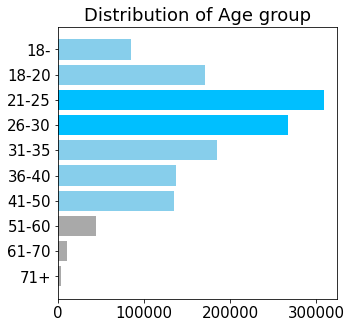

In [16]:
#Graphic:bar of age group
color=['darkgrey','darkgrey','darkgrey','skyblue','skyblue','skyblue','deepskyblue','deepskyblue','skyblue','skyblue']
plt.rcParams['font.size']=15
plt.figure(figsize=(5,5))
plt.title('Distribution of Age group')
barh=plt.barh(BD.index,BD.Groupage,color=color)

## Transcation

In [17]:
df_T=pd.read_csv('transactions.csv')
df_T.shape

(21547746, 9)

In [18]:
#check duplicates
df_T.nunique()

msno                      2363626
payment_method_id              40
payment_plan_days              37
plan_list_price                51
actual_amount_paid             57
is_auto_renew                   2
transaction_date              790
membership_expire_date       1559
is_cancel                       2
dtype: int64

In [19]:
df_T.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

In [20]:
#select month valus form  membership_expire_date as DATE
df_T['DATE']=pd.DataFrame([d[0:6] for d in df_T['membership_expire_date'].astype(str)])

In [21]:
#drop  duplicates user id  & keep the lastest transactions record
df_t=df_T.sort_values('transaction_date',ascending=(False)).drop_duplicates('msno')

In [22]:
#calculate the total transaction records of each user (only counts once a month) 
df_T['t_times']=1
transactionstime=df_T.groupby(['msno','DATE'])['t_times'].count()
transactionstime=transactionstime.count('msno')
df_t=pd.merge(df_t,transactionstime,on='msno',how='left')
df_t.nunique()

C:\Users\jean0\AppData\Local\Temp/ipykernel_16116/1481480046.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. ser.count(level=1) should use ser.groupby(level=1).count().
  transactionstime=transactionstime.count('msno')


msno                      2363626
payment_method_id              40
payment_plan_days              37
plan_list_price                50
actual_amount_paid             53
is_auto_renew                   2
transaction_date              790
membership_expire_date        861
is_cancel                       2
DATE                           49
t_times                        28
dtype: int64

In [23]:
#sum the totalcharge price per user
totalcharges=df_T.groupby(['msno'])['plan_list_price'].sum()
totalcharges.name='totalcharges'
df_t=pd.merge(df_t,totalcharges,on='msno',how='left')

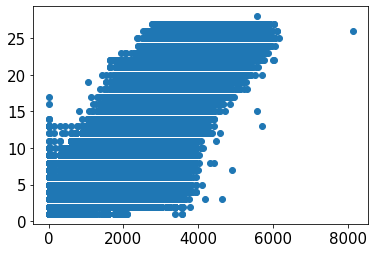

In [24]:
plt.scatter(df_t.totalcharges,df_t.t_times)

In [25]:
df_t.totalcharges.value_counts()

0       411234
298     251453
149      94937
1788     81671
3725     69470
         ...  
5394         1
1802         1
5039         1
1361         1
44           1
Name: totalcharges, Length: 4710, dtype: int64

In [26]:
plt.rcParams['font.size']=15
#df_t.hist(color='deepskyblue',figsize=(16, 10))

In [27]:
#grouping the transaction time as user loyalty
tt=df_t.t_times.value_counts()
bins = [0,1,4,12,18,24,max(df_t.t_times)]
df_t['user_level'] = pd.cut(df_t.t_times, bins, labels= np.arange(1, len( bins) ) )
df_t['user_level'] = df_t['user_level'].astype('int')

In [28]:
pybins = [0,34,35,36,37,38,39,40,41]
df_t['payment_method_id'] = pd.cut(df_t.payment_method_id,pybins, labels= np.arange(1, len(pybins) ) )
df_t['payment_method_id'] = df_t['payment_method_id'].astype('int')
payment_med=df_t['payment_method_id'].value_counts().sort_index(ascending=True)
df_t.payment_method_id.value_counts().sort_index()

1    287934
2    428109
3    135221
4     52994
5    289060
6     93507
7    121788
8    955013
Name: payment_method_id, dtype: int64

In [29]:
def DATE(df_t):
    if df_t['DATE']=='201703':
        df_t['contract']='0'
    else:
        df_t['contract']='1'
    return df_t
df_t=df_t.apply(DATE,axis=1)

In [30]:
df_t.contract.value_counts()

1    1384247
0     979379
Name: contract, dtype: int64

## user log

In [31]:
df_userlog=pd.read_csv('user_logs_v2.csv',header=0,encoding='utf-8-sig')
df_userlog.shape

(18396362, 9)

In [32]:
#create new table in sqlite
sqlstr='''CREATE TABLE IF NOT EXISTS userlog(NSNO TEXT NOT NULL) '''
conn=sqlite3.connect('db')
cursor=conn.cursor()
cursor.execute(sqlstr)
conn.commit()
df_userlog.to_sql('userlog', con=conn, if_exists='replace')
print('userlog Records created successfully')

#last 1 month user data
#find avg seconds played per user/ ratio songs played of song length
user_engagement='''Select msno,COUNT(msno) as log_counts, round(avg(num_unq),0) avg_unisongs_listened,
round(avg(total_secs),0) 'avg_totalseconds' ,
round((sum(num_25)*0.25+sum(num_50)*0.5+sum(num_75)*0.75+sum(num_985)*0.985+sum(num_100))/
sum(num_25+num_50+num_75+num_985+num_100),1)  listening_rate 
FROM userlog
GROUP BY MSNO'''
cursor.execute(user_engagement)
conn.commit()
df_usereng_1m=pd.read_sql(user_engagement,conn)
df_usereng_1m.columns
df_usereng_1m.describe().T

userlog Records created successfully


,count,mean,std,min,25%,50%,75%,max
log_counts,1103894.0,16.664971,10.303328,1.0,7.0,18.0,26.0,31.0
avg_unisongs_listened,1103894.0,23.981450,20.658422,1.0,11.0,19.0,30.0,1560.0
avg_totalseconds,1103894.0,6295.604971,6532.292049,0.0,2631.0,4573.0,7622.0,536354.0
listening_rate,1103894.0,0.814200,0.153109,0.3,0.7,0.8,0.9,1.0


In [33]:
#Total Second played
bins_song =[ -0.1,0,1800,3600,4400,7200,10800,max(df_usereng_1m['avg_totalseconds'])]
df_usereng_1m['secs_range'] = pd.cut(df_usereng_1m['avg_totalseconds'],bins_song, 
                                    labels= np.arange(len( bins_song)-1))
sec_total=df_usereng_1m['secs_range'].value_counts().sort_index(ascending=True)
sec_total.index=['0','0-1800s','1800-3600s','3600-4400s','4400-7200s','7200-10800s','10800s+']
print(sec_total)

0                 131
0-1800s        167396
1800-3600s     250270
3600-4400s     111819
4400-7200s     272145
7200-10800s    151435
10800s+        150698
Name: secs_range, dtype: int64


In [34]:
df_usereng_1m.secs_range.value_counts()

4    272145
2    250270
1    167396
5    151435
6    150698
3    111819
0       131
Name: secs_range, dtype: int64

In [35]:
#input kkbox train dataset
df_Train=pd.read_csv('train.csv',header=0,encoding='utf-8-sig')

In [36]:
df_Train.shape

(992931, 2)

## Merge

In [37]:
#%%merge ahttp://localhost:8888/notebooks/kkbox%20chrun%20prediction.ipynb#Mergell data by userID
df_All=pd.merge(df_Train,df_t,left_on='msno',right_on='msno')
df_All=pd.merge(df_All,df_usereng_1m,on='msno',how='left')
df_All=pd.merge(df_All,df_BD,on='msno',how='left')

In [38]:
df_All.nunique()

msno                      992931
is_churn                       2
payment_method_id              8
payment_plan_days             31
plan_list_price               39
actual_amount_paid            39
is_auto_renew                  2
transaction_date             588
membership_expire_date       466
is_cancel                      2
DATE                          19
t_times                       28
totalcharges                4450
user_level                     6
contract                       2
log_counts                    31
avg_unisongs_listened        296
avg_totalseconds           36072
listening_rate                 8
secs_range                     7
bd                           100
gender                         3
city                          21
registered_via                 5
Groupage                      10
dtype: int64

In [39]:
df_All.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel', 'DATE',
       't_times', 'totalcharges', 'user_level', 'contract', 'log_counts',
       'avg_unisongs_listened', 'avg_totalseconds', 'listening_rate',
       'secs_range', 'bd', 'gender', 'city', 'registered_via', 'Groupage'],
      dtype='object')

### gender / age 

In [40]:
df_All.gender=df_All.gender.replace(np.nan,'No Data')

<AxesSubplot:title={'center':'User gender'}, ylabel='gender'>

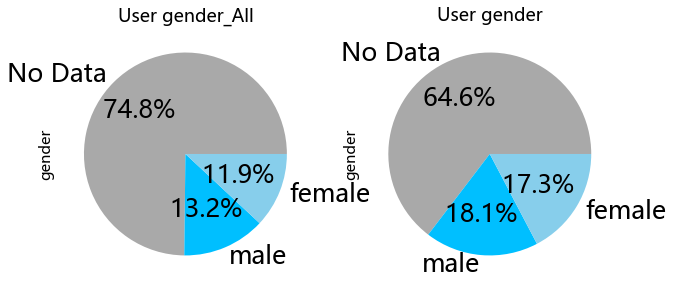

In [41]:
#Visualize the distribution of gender
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['font.size']=15
color=['darkgrey','deepskyblue','skyblue']
def datalabel(data):
   def inner_datalabel(pct):
       total=sum(data)
       val=int(round(pct*total/100.0))
       return '{p:.1f}% '.format(p=pct)
   return inner_datalabel
plt.subplot(121)
df_All.gender.value_counts().plot(kind='pie',title='User gender_All',fontsize=25,colors=color,figsize=(10, 10),autopct=datalabel(df_All.gender.value_counts()))
plt.subplot(122)
df_M.gender.value_counts().plot(kind='pie',title='User gender',fontsize=25,colors=color,figsize=(10, 10),autopct=datalabel(df_M.gender.value_counts()))

<AxesSubplot:ylabel='bd'>

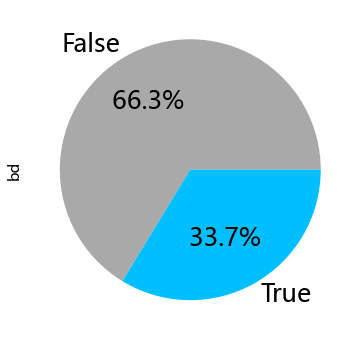

In [42]:
#Visualize the distribution of gender
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['font.size']=15
color=['darkgrey','deepskyblue','skyblue']
df_BD.bd.notnull().value_counts().plot(kind='pie',fontsize=25,colors=color,figsize=(6, 6),autopct=datalabel(df_BD.bd.notnull().value_counts()))

In [43]:
df_BD.bd.isnull().value_counts()

True     2647479
False    1346538
Name: bd, dtype: int64

In [44]:
df_BD['Groupage'].value_counts().sort_index()

18-       85013
18-20    170771
21-25    308412
26-30    266790
31-35    184230
36-40    137219
41-50    134705
51-60     44308
61-70     10795
71+        3980
Name: Groupage, dtype: int64

In [45]:
age_mapping = {
    '18-':1,'18-20':2,'21-25':3,'26-30':4,
    '31-35':5,'36-40':6,'41-50':7,'51-60':8,
    '61-70':9,'71+':10}
df_All['Groupage'] = df_All['Groupage'].map(age_mapping)

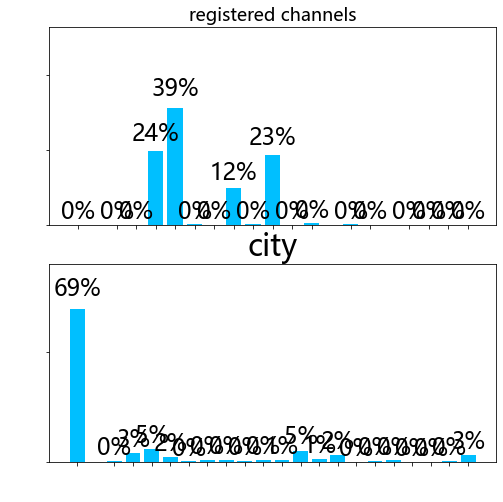

In [46]:
#registered method
RM=df_M.registered_via.value_counts()/df_M.registered_via.count()
def createLabels(data):                  
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., height*1.05, 
            '%.d%%' %int(height*100),ha = "center",va = "bottom",size=23)
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('registered channels')
plt.xticks(RM.index,alpha=0)
plt.ylim(0,0.66)
plt.yticks(alpha=0)
plt.rcParams['font.size']=25
RMBAR=plt.bar(RM.index,RM,color='deepskyblue')
createLabels(RMBAR)
plt.subplot(212)
plt.ylim(0,0.9)
city=df_M.city.value_counts()/df_M.city.count()
plt.title('city')
plt.xticks(city.index,alpha=0)
plt.yticks(alpha=0)
citybar=plt.bar(city.index,city,color='deepskyblue')
createLabels(citybar)
plt.show()

### Transcation/loyalty/ payment

In [47]:
#check Plan price & Plan days
df_All[['payment_plan_days','plan_list_price']].agg(['average','min', 'max']).T

,average,min,max
payment_plan_days,34.220233,0.0,450.0
plan_list_price,146.533922,0.0,2000.0


In [48]:
#colormap
def color(a):
    C=[]
    cmap = mpl.cm.get_cmap('cool')
    for c in np.arange(0.1,0.6,0.1):
        C.append(cmap(c))
    cmap1 = mpl.cm.get_cmap('Greys_r')
    for c1 in np.arange(0.5,a,0.1):
        C.append(cmap1(c1))
    return C 

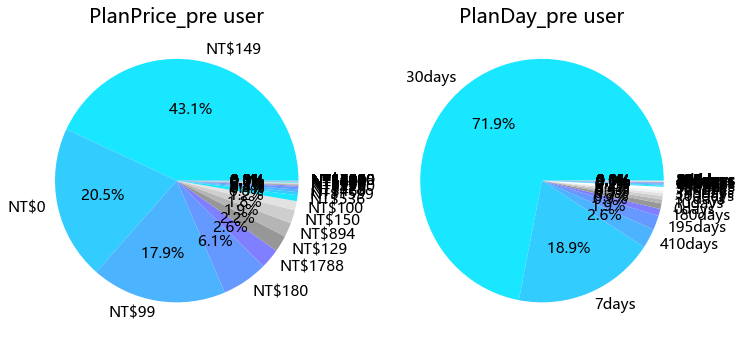

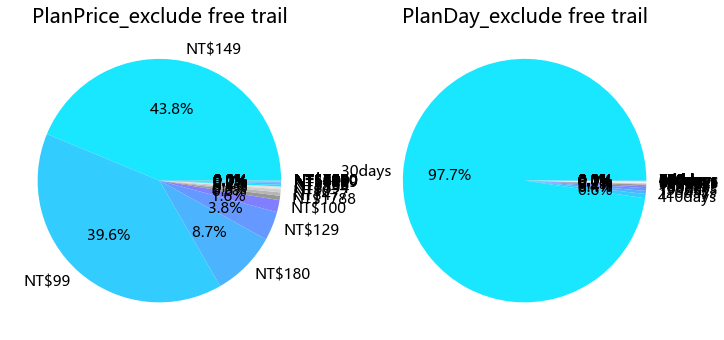

In [49]:
#Graphic: plan price & plan days top 10
def T(T,t):
    price10=T['plan_list_price'].value_counts()[0:100]
    labels=[f'NT${i}' for i in price10.index[0:100]]
    plt.figure(figsize=(12,8))
    plt.rcParams['font.size']=15
    plt.subplot(1,2,1)
    plt.title('PlanPrice'+str(t),fontsize=20)
    plt.pie(price10,labels=labels,autopct=datalabel(price10),colors=color(0.9))
    plan12=T['payment_plan_days'].value_counts()[0:100]
    label=[f'{a}days' for a in plan12.index[0:100]]
    plt.subplot(1,2,2)
    plt.title('PlanDay'+str(t),fontsize=20)
    plt.pie(plan12,labels=label,autopct=datalabel(plan12),colors=color(1.2))
    plt.show()   
T(df_t,'_pre user')
T(df_All,'_exclude free trail')


In [50]:
bin_day =[-0.1,7,30,max(df_All['payment_plan_days'])]
df_All['planday_group'] = pd.cut(df_All['payment_plan_days'],bin_day, 
                                     labels= np.arange(1,len( bin_day)) )
group_day=df_All['planday_group'].value_counts().sort_index(ascending=True)
print(group_day/sum(group_day))

1    0.002448
2    0.977053
3    0.020499
Name: planday_group, dtype: float64


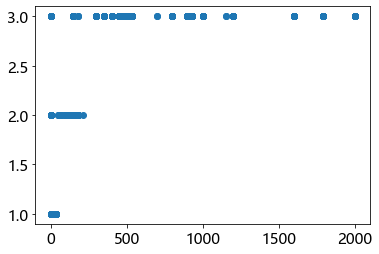

In [51]:
#plan day vs plan price
plt.scatter(df_All.plan_list_price,df_All.planday_group)

In [52]:
df_tt=df_t[df_t.payment_plan_days!=7]
df_tt=df_tt[df_tt.plan_list_price!=0] 

In [53]:
def Bar(X):
    total=0
    for i in  X:
        total+=i
    for c,y in zip(X.index,X):
      plt.text(c,y+max(X)*0.05,str('{:,d}\n({:.2f}%)'.format(y,(y/total*100))),ha='center')

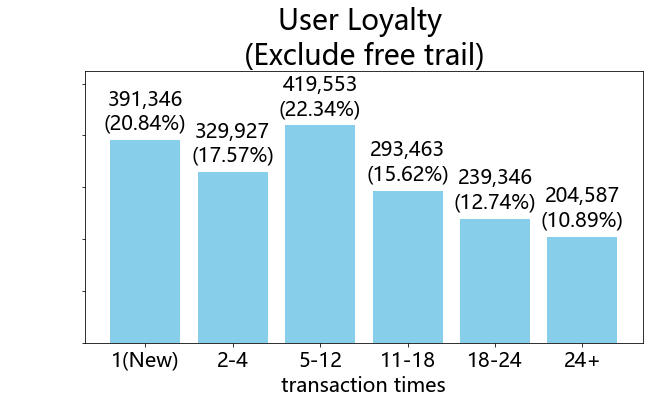

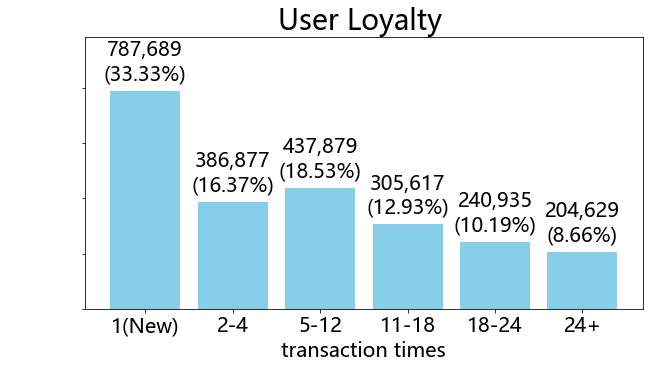

In [54]:
#Graphic:loyalty
def show(x,word):
    user_level=x['user_level'].value_counts().sort_index(ascending=True)
    df_All.user_level.value_counts().sort_index()
    plt.figure(figsize=(10,5))
    plt.rcParams['axes.facecolor'] = 'w'
    plt.rcParams['font.size']=20
    plt.title('User Loyalty '+str(word),size=28)
    times=['1(New)','2-4','5-12','11-18','18-24','24+']
    plt.yticks(alpha=0)
    plt.ylim(0,max(user_level)*1.25)
    plt.xlabel('transaction times')
    ttbar=plt.bar(user_level.index,user_level,color='skyblue',tick_label=times)
    Bar(user_level)
show(df_tt,'\n(Exclude free trail)')
show(df_t,'')

In [55]:
#auto_Renew
df_All['is_auto_renew'].value_counts()/df_All['is_auto_renew'].count()

1    0.889035
0    0.110965
Name: is_auto_renew, dtype: float64

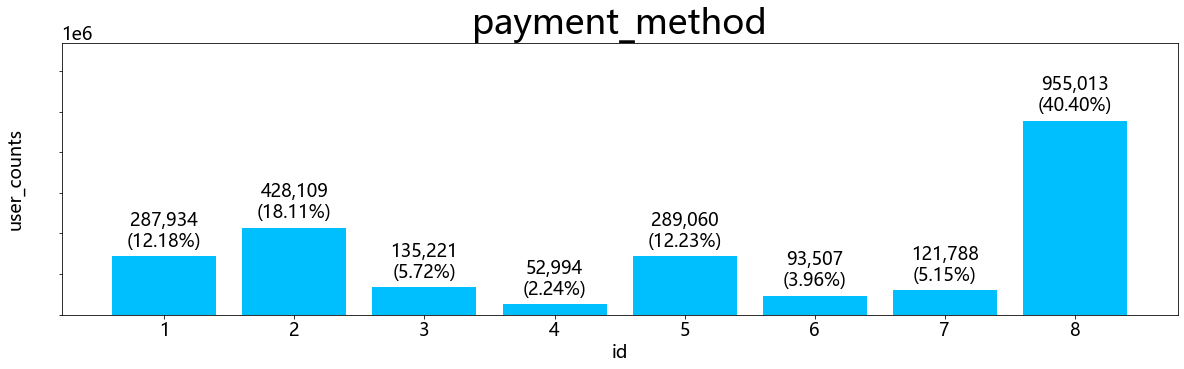

In [56]:
#Graphic:payment method 
pm=df_t['payment_method_id'].value_counts().sort_index(ascending=False)
plt.rcParams['font.size']=18
plt.figure(figsize=(20,5))
plt.title('payment_method',size=35)
plt.xlabel('id')
plt.ylabel('user_counts')
plt.xticks(pm.index)
plt.yticks(alpha=0)
plt.ylim(0,max(pm)*1.4)
pmbar=plt.bar(pm.index,pm,color='deepskyblue')
Bar(pm)

### ratio/total secs

In [57]:
df_userlog.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [58]:
df_userlog.nunique()

msno           1103894
date                31
num_25             743
num_50             356
num_75             193
num_985            340
num_100           1115
num_unq            776
total_secs    10701475
dtype: int64

In [59]:
df_All.listening_rate.value_counts().sort_index()

0.3      4694
0.4      6595
0.5     17275
0.6     41333
0.7     94180
0.8    187520
0.9    269408
1.0    118784
Name: listening_rate, dtype: int64

In [60]:
#ratio of songs played
df_All.listening_rate=df_All.listening_rate.astype(str)
Usere=df_All.listening_rate.value_counts().sort_index()
Usere.index=['0','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']
Usere/df_All.listening_rate.count()
Usere

0        4694
0.3      6595
0.4     17275
0.5     41333
0.6     94180
0.7    187520
0.8    269408
0.9    118784
1      253142
Name: listening_rate, dtype: int64

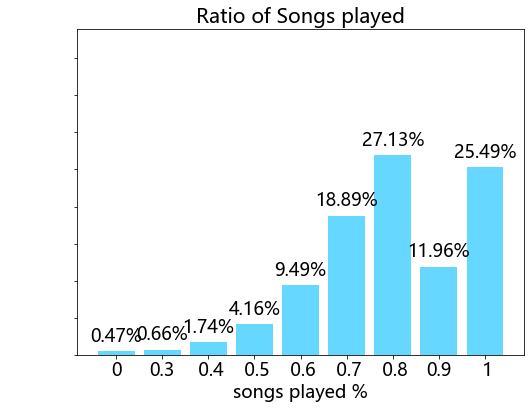

In [61]:
#Graphic:ratio of songs played
plt.figure(figsize=(8,6))
plt.title('Ratio of Songs played',size=20)
rates=['0','0.3',' 0.4',' 0.5',' 0.6',' 0.7',' 0.8','0.9',' 1']
plt.yticks(alpha=0)
#plt.xticks(rates)
plt.xlabel('songs played %')
plt.ylim(0,440000)
uebar=plt.bar(Usere.index,Usere,color='deepskyblue',tick_label=rates,alpha=0.6)
total=0
for i in  Usere:
    total+=i
for c,y in zip(Usere.index,Usere):
  plt.text(c,y+max(Usere)*0.05,str('{:.2f}%'.format((y/total*100))),ha='center')

In [62]:
#find avg seconds played per user
df_userlog.groupby('msno')['total_secs'].mean()
unisongs=df_usereng_1m.avg_unisongs_listened.astype(int)
unisongs.value_counts()[0:20]
unisongs.count()

1103894

In [63]:
#average song length played per users
tlist=['num_25', 'num_50', 'num_75', 'num_985', 'num_100','num_unq', 'total_secs']
Userlog_avg=df_userlog.groupby('msno')[tlist].mean().astype(int).reset_index()
Userlog_avg.total_secs.describe()
print(Userlog_avg.num_unq.describe())
print(Userlog_avg['num_unq'].mean())
Userlog_avg['total_secs'].mean() 

count    1.103894e+06
mean     2.354242e+01
std      2.062824e+01
min      1.000000e+00
25%      1.100000e+01
50%      1.800000e+01
75%      3.000000e+01
max      1.560000e+03
Name: num_unq, dtype: float64
23.542415304367992


6295.108246806306

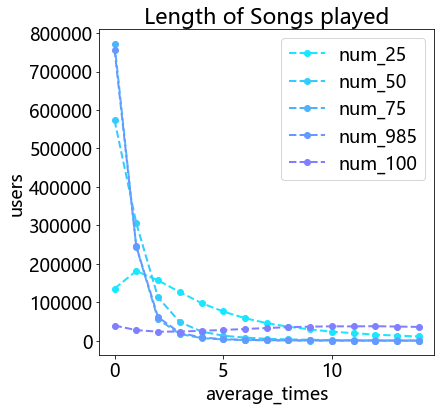

In [64]:
#Graphic: check unique distribution
def Plot(nn,n):
    plt.figure(figsize=(6,6))
    plt.title('Length of Songs played')
    plt.xlabel('average_times')
    plt.ylabel('users')
    N=0  
    for Col in Userlog_avg.columns[nn:n+1]:  
      num=Userlog_avg[Col].value_counts().sort_index()[0:15]
      plt.plot(num,'--o',label=Col,color=colors[N],linewidth=2)
      N+=1
      plt.legend()
colors=color(0.7)
Plot(1,5)

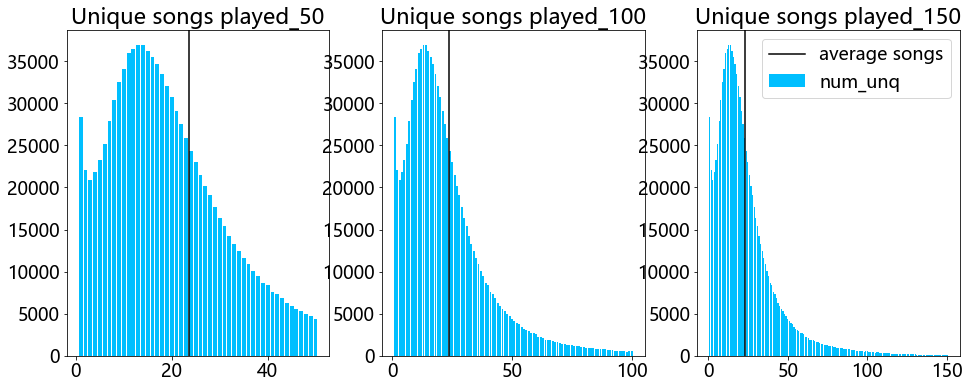

In [65]:
def unisong(n,r,z):
    plt.figure(figsize=(16,6))
    
    plt.xlabel('songs')
    plt.ylabel('user counts')
    plt.subplot(1,3,1)
    plt.title('Unique songs played_'+str(n))
    plt.bar(Userlog_avg['num_unq'].value_counts().sort_index()[0:n].index,
            Userlog_avg['num_unq'].value_counts().sort_index()[0:n].values,
             label='num_unq',color='deepskyblue')
    plt.axvline(x=23.5,c='k',label='average songs')
    plt.subplot(1,3,2)
    plt.title('Unique songs played_'+str(r))
    plt.bar(Userlog_avg['num_unq'].value_counts().sort_index()[0:r].index,
            Userlog_avg['num_unq'].value_counts().sort_index()[0:r].values,
             label='num_unq',color='deepskyblue')
    plt.axvline(x=23.5,c='k',label='average songs')
    plt.subplot(1,3,3)
    plt.title('Unique songs played_'+str(z))
    plt.bar(Userlog_avg['num_unq'].value_counts().sort_index()[0:z].index,
            Userlog_avg['num_unq'].value_counts().sort_index()[0:z].values,
             label='num_unq',color='deepskyblue')
    plt.axvline(x=23.5,c='k',label='average songs')
    plt.legend()

unisong(50,100,150)

In [66]:
df_usereng_1m.columns

Index(['msno', 'log_counts', 'avg_unisongs_listened', 'avg_totalseconds',
       'listening_rate', 'secs_range'],
      dtype='object')

In [67]:
df_usereng_1m.isnull().sum()

msno                     0
log_counts               0
avg_unisongs_listened    0
avg_totalseconds         0
listening_rate           0
secs_range               0
dtype: int64

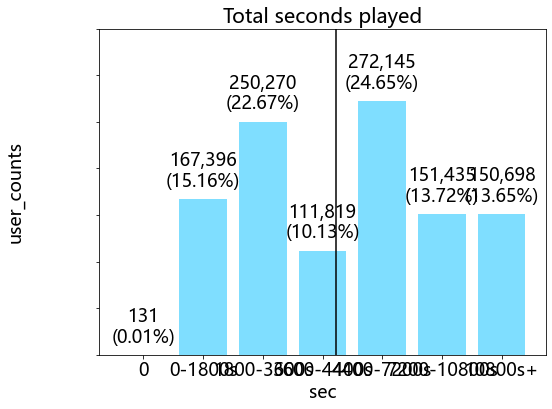

In [68]:
#Graphic:total sec
plt.figure(figsize=(8,6))
plt.title('Total seconds played',size=20)

plt.yticks(alpha=0)
plt.ylim(0,350000)
plt.xlabel('sec')
plt.ylabel('user_counts')
secbar=plt.bar(sec_total.index,sec_total,color='deepskyblue',alpha=0.5)
plt.axvline(x=3.23,c='k',label='average songs')
total=0
for i in  sec_total:
    total+=i
for c,y in zip(sec_total.index,sec_total):
  plt.text(c,y+max(sec_total)*0.05,str('{:,d}\n({:.2f}%)'.format(y,(y/total*100))),ha='center')

### Churn -Data Visualization 

In [69]:
df_All.isnull().sum()

msno                           0
is_churn                       0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
DATE                           0
t_times                        0
totalcharges                   0
user_level                     0
contract                       0
log_counts                253142
avg_unisongs_listened     253142
avg_totalseconds          253142
listening_rate                 0
secs_range                253142
bd                        744613
gender                         0
city                      455485
registered_via            455485
Groupage                  744637
planday_group                  0
dtype: int64

##Churn

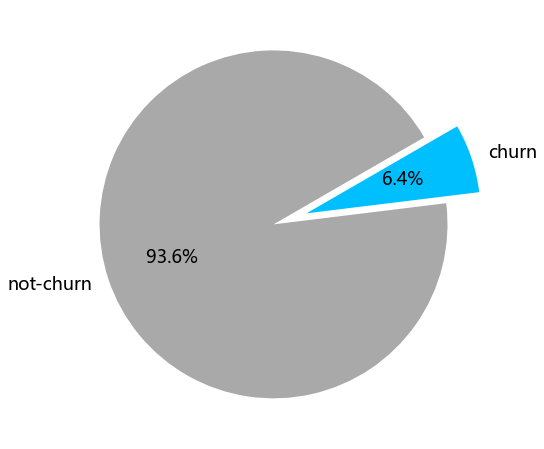

In [70]:
#check the churn rate
plt.figure(figsize=(8,8))
plt.rcParams['font.size']=18
data=df_All['is_churn'].value_counts()
labels=['not-churn','churn']  
colors=['darkgrey','deepskyblue']        
explode= [0,0.2]
plt.pie(data, labels=labels, autopct=datalabel(data),
        colors=colors,startangle=30,explode=explode)                                                                                          
plt.show()

In [71]:
df_All['totalcharges'].agg(['average','max','min','count'])

average      2101.682697
max          8139.000000
min             0.000000
count      992931.000000
Name: totalcharges, dtype: float64

In [72]:
bin_day =[-0.1,7,30,max(df_All['payment_plan_days'])]
df_All['planday_group'] = pd.cut(df_All['payment_plan_days'],bin_day, 
                                     labels= np.arange(1,len( bin_day)) )
group_day=df_All['planday_group'].value_counts().sort_index(ascending=True)
print(group_day/sum(group_day))

1    0.002448
2    0.977053
3    0.020499
Name: planday_group, dtype: float64


<AxesSubplot:xlabel='bd', ylabel='avg_unisongs_listened'>

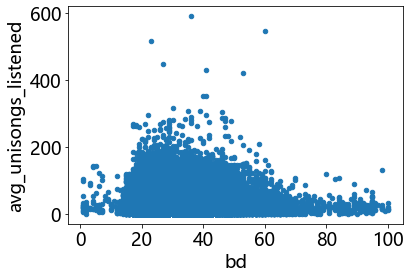

In [73]:
df_All[['bd','avg_unisongs_listened']].plot.scatter(x ='bd',y='avg_unisongs_listened')

<AxesSubplot:xlabel='bd', ylabel='t_times'>

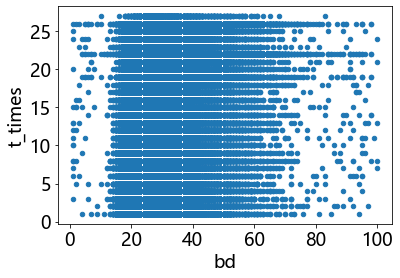

In [74]:
df_All[['bd','t_times']].plot.scatter(x ='bd',y='t_times')

<AxesSubplot:xlabel='plan_list_price', ylabel='totalcharges'>

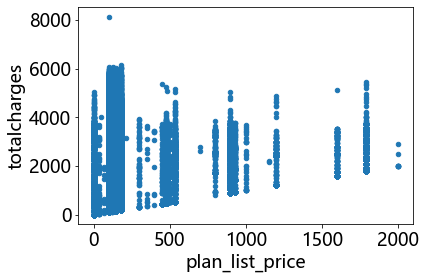

In [75]:
df_All[['plan_list_price','totalcharges']].plot.scatter(x ='plan_list_price',y='totalcharges')

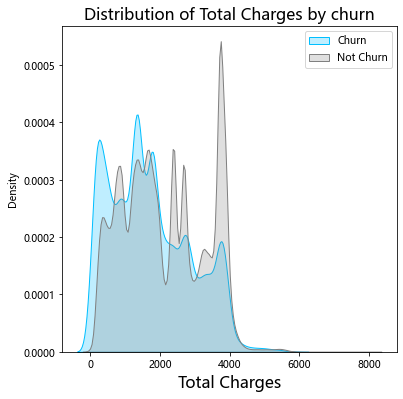

In [76]:
import seaborn as sns
def DTB(col,title):
    plt.figure(figsize=(6,6))
    plt.rcParams['font.size']=10
    ax = sns.kdeplot(df_All[col][(df_All["is_churn"] == 1)],
                    color="deepskyblue", shade= True)
    ax = sns.kdeplot(df_All[col][(df_All["is_churn"] == 0)],
                     ax =ax,color="Gray", shade = True)   
    ax.legend(["Churn","Not Churn"],loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(title,size=16)
    ax.set_title('Distribution of '+str(title)+' by churn',size=16)
DTB('totalcharges','Total Charges')

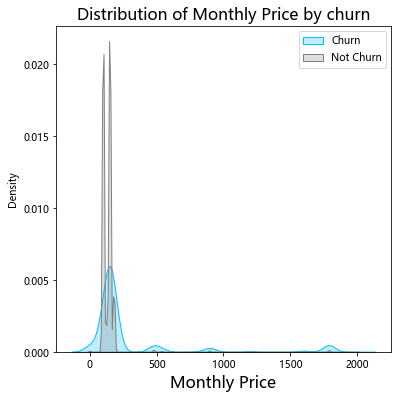

In [77]:
DTB('plan_list_price','Monthly Price')

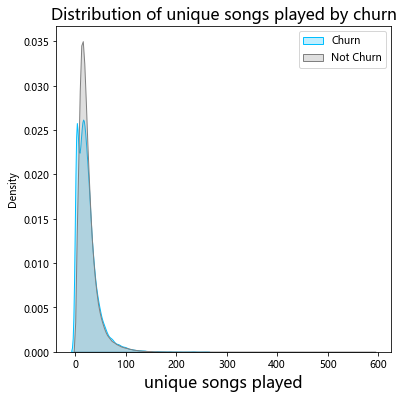

In [78]:
DTB('avg_unisongs_listened','unique songs played')

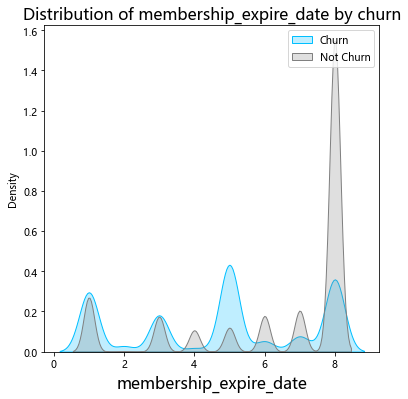

In [79]:
DTB('payment_method_id','membership_expire_date')

In [80]:
plan='''Select plan_list_price,
case 
    when payment_plan_days=30 then '30'
    when payment_plan_days=7 then '7'
    else 'oth'
END AS plan_days,
count(msno) num ,sum(is_churn) ,cast(sum(is_churn) as float)/cast(count(msno) as float) as churn
FROM user
GROUP BY plan_list_price,plan_days
order by sum(is_churn) desc,churn desc '''
cursor.execute(plan)
conn.commit()
df_plan=pd.read_sql(plan,conn)

In [81]:
#Plan price
#select top 16 where total churn >100
Plan=df_plan.sort_values('sum(is_churn)',ascending=False)[0:20]
Plan=Plan.groupby('plan_list_price').mean()
Plan=Plan.sort_index()
Plan.num=Plan.num.astype(int)
Plan.churn=Plan.churn.astype(float)
Plan.index=Plan.index.astype(str)
Plan['Notchurn']=Plan.num-Plan['sum(is_churn)'].astype(int)
Plan['sum(is_churn)'].astype(int)

plan_list_price
0        1421
99       8955
100       602
120        80
129      1396
149     27798
150       593
180     10813
300        43
447        80
477      2251
480       394
536      1109
799       128
894      1783
930       182
1200      269
1599      598
1788     3382
Name: sum(is_churn), dtype: int32

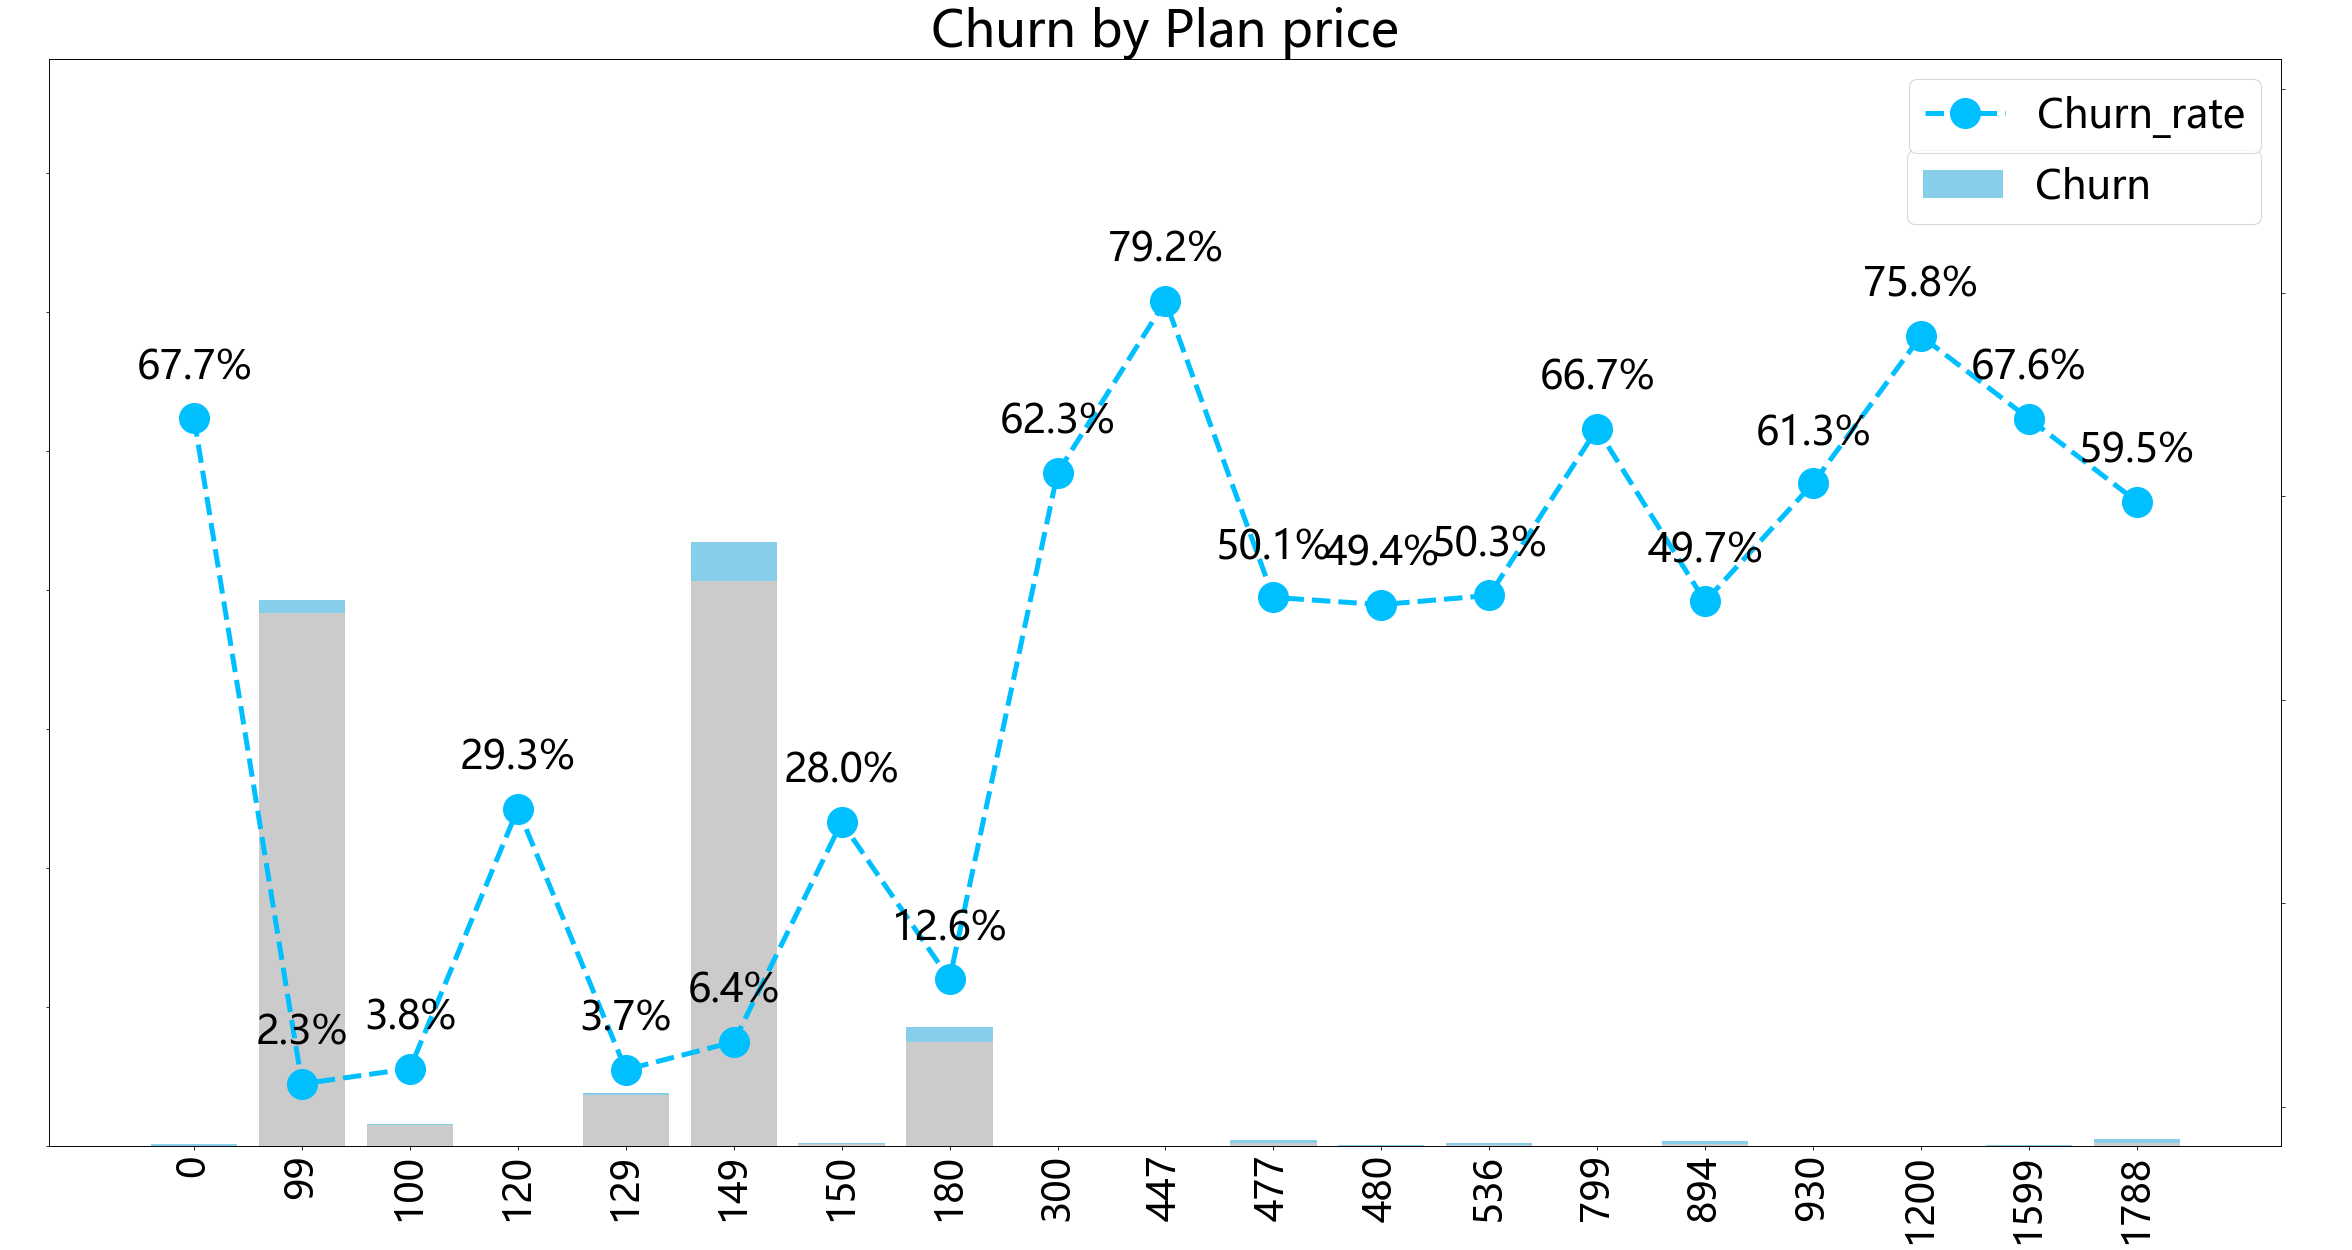

In [82]:
fig = plt.figure(figsize=(40,20))
ay1 = fig.add_subplot(111)
plt.rcParams['font.size']=40
plt.title('Churn by Plan price',size=50) 
plt.yticks(alpha=0)
plt.xticks(rotation=90,size=38)
plt.ylim(0,max(Plan.num)*1.8)
plt.bar(Plan.num.index,Plan.Notchurn,color='darkgrey',alpha=0.6)
plt.bar(Plan.num.index,Plan['sum(is_churn)'],bottom=Plan.Notchurn,color='skyblue',label='Churn        ')
plt.legend(bbox_to_anchor=(1, 0.935)) 
ay2 = ay1.twinx()
plt.ylim(-min(Plan.churn)*1.7,max(Plan.churn)*1.3)
plt.yticks(alpha=0)
plt.plot(Plan.index,Plan.churn,'--o',color='deepskyblue',linewidth='5',markersize="30",label='Churn_rate')
plt.legend()
for c,y in zip(Plan.churn.index,Plan.churn):
  plt.text(c,y+max(Plan.churn)*0.05,str('{:.1f}%'.format(y*100)),ha='center')

In [83]:
df=df_All[['totalcharges','is_churn']]
totalcharges=df.totalcharges.value_counts().sort_index()

In [84]:
#churn variables
df_all_na=df_All.replace(np.nan,'nodata')
df_All.isnull().sum()/df_All.shape[0]

for col in df_All.columns[7:]:
 print(pd.crosstab(df_All['is_churn'],df_All[col]))

transaction_date  20150102  20150104  20150120  20150123  20150124  20150126  \
is_churn                                                                       
0                        0         0         0         0         0         0   
1                        2         1         2         1         1         1   

transaction_date  20150201  20150202  20150207  20150212  ...  20170219  \
is_churn                                                  ...             
0                        1         1         0         0  ...     26762   
1                        0         1         1         1  ...       809   

transaction_date  20170220  20170221  20170222  20170223  20170224  20170225  \
is_churn                                                                       
0                    26797     26647     25569     24844     24501     25380   
1                      908       810       735       827       710       645   

transaction_date  20170226  20170227  20170228  
is_churn

In [85]:
df_All.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel', 'DATE',
       't_times', 'totalcharges', 'user_level', 'contract', 'log_counts',
       'avg_unisongs_listened', 'avg_totalseconds', 'listening_rate',
       'secs_range', 'bd', 'gender', 'city', 'registered_via', 'Groupage',
       'planday_group'],
      dtype='object')

In [86]:
#Graphic
def Column(col,TITLE,loc,l,*a):
    xticks=[]
    for i in a:
     xticks.append(str(i))
    C=pd.crosstab(df_All['is_churn'],df_All[col]).columns.astype(str)
    V=pd.crosstab(df_All['is_churn'],df_All[col]).values
    np.sum(V,axis=0)
    Y=np.divide(V[1],np.sum(V,axis=0))
    actualNum=df_All[col].sort_index().value_counts()
    fig = plt.figure(figsize=(8,6))
    ay1 = fig.add_subplot(111)
    plt.rcParams['font.size']=15
    plt.title(TITLE,size=25)
    plt.yticks(alpha=0)
    plt.xticks(size=18)
    plt.ylim(0,max(actualNum)*2.1)
    plt.bar(C,V[0],color='darkgrey',tick_label=xticks,alpha=0.6)
    plt.bar(C,V[1],color='skyblue',bottom=V[0],tick_label=xticks,alpha=0.6,label='Churn      ')
    plt.legend(bbox_to_anchor=(l, 0.93))
    ay2 = ay1.twinx()
    plt.ylim(-min(Y)*0.7,max(Y)*1.2)
    plt.yticks(alpha=0)
    plt.plot(C,Y,'--o',color='deepskyblue',linewidth='3',markersize="20",label='Churn rate')
    plt.legend(loc=loc)
    for i in range(len(Y)):
     print('%s: %.2f %%'%(C[i],Y[i]))
     for c,y in zip(C,Y):
      plt.text(str(c),y+max(Y)*0.05,str('{:.1f}%'.format(y*100)),ha='center')

In [87]:
df_All.listening_rate=df_All.listening_rate.replace(np.nan,0)

In [88]:
df_All.listening_rate.value_counts()

0.9    269408
nan    253142
0.8    187520
1.0    118784
0.7     94180
0.6     41333
0.5     17275
0.4      6595
0.3      4694
Name: listening_rate, dtype: int64

0.3: 0.07 %
0.4: 0.04 %
0.5: 0.04 %
0.6: 0.03 %
0.7: 0.03 %
0.8: 0.03 %
0.9: 0.03 %
1.0: 0.03 %
nan: 0.16 %


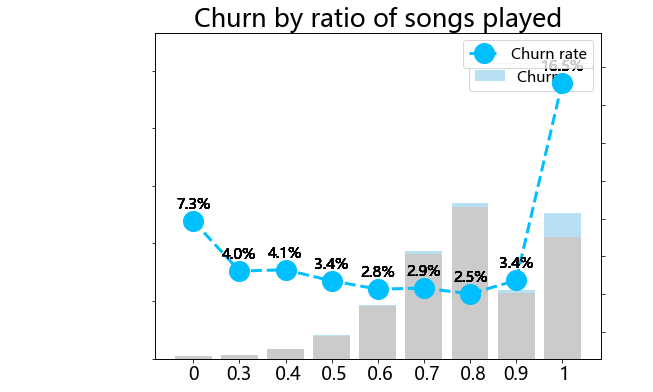

In [89]:
Column('listening_rate','Churn by ratio of songs played','best',1,'0','0.3',' 0.4',' 0.5',' 0.6',' 0.7',' 0.8','0.9',' 1')     

1: 0.83 %
2: 0.05 %
3: 0.54 %


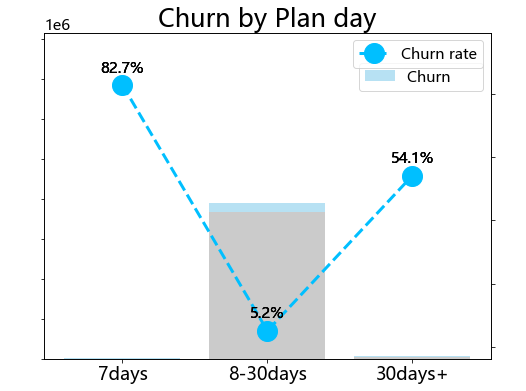

In [90]:
Column('planday_group','Churn by Plan day','best',1,'7days','8-30days','30days+')

0: 0.04 %
1: 0.77 %


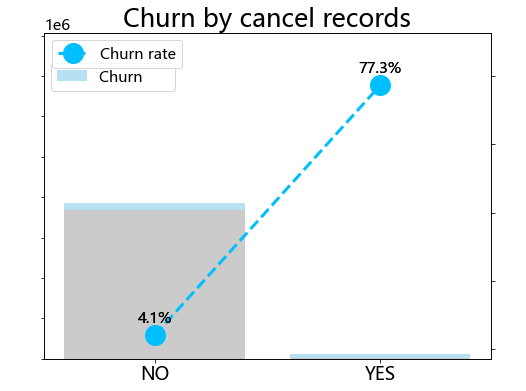

In [91]:
Column('is_cancel','Churn by cancel records','upper left',0.31,'NO','YES')

In [92]:
df_All.DATE.value_counts()

201703    889585
201702     95526
201701      4876
201603       637
201602       606
201611       301
201612       213
201601       163
201610       161
201512       156
201609       141
201608       122
201607       101
201604        98
201605        92
197001        76
201606        72
201511         4
201404         1
Name: DATE, dtype: int64

0: 0.01 %
1: 0.53 %


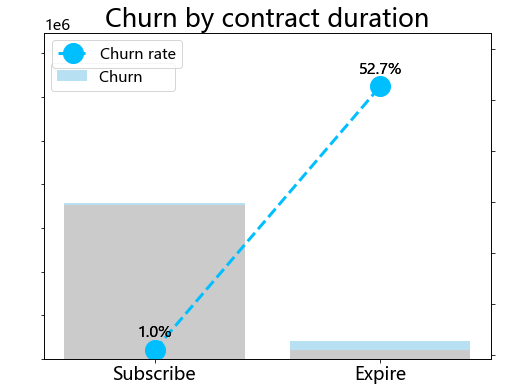

In [93]:
Column('contract','Churn by contract duration','upper left',0.31,'Subscribe','Expire')

In [94]:
df_All.secs_range.value_counts().sort_index()

0        17
1     86772
2    177197
3     79317
4    190729
5    103800
6    101957
Name: secs_range, dtype: int64

In [95]:
pd.crosstab(df_All['is_churn'],df_All['secs_range'])

secs_range,0,1,2,3,4,5,6
is_churn,,,,,,,
0,14,81810,173287,77442,185700,100842,98990
1,3,4962,3910,1875,5029,2958,2967


In [96]:
df_All.secs_range=df_All.secs_range.replace(np.nan,0)

0: 0.18 %
1: 0.06 %
2: 0.02 %
3: 0.02 %
4: 0.03 %
5: 0.03 %
6: 0.03 %


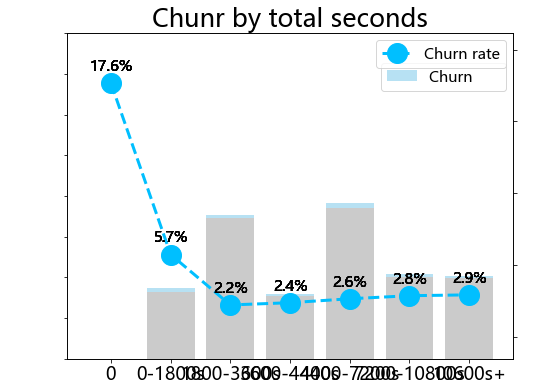

In [97]:
Column('secs_range','Chunr by total seconds','best',1,'0','0-1800s','1800-3600s','3600-4400s','4400-7200s','7200-10800s','10600s+')

3.0: 0.12 %
4.0: 0.18 %
7.0: 0.03 %
9.0: 0.08 %
13.0: 0.09 %


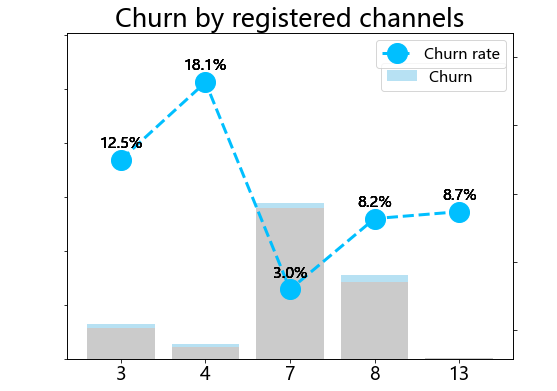

In [98]:
Column('registered_via','Churn by registered channels','best',1,'3','4','7','8','13')

1: 0.12 %
2: 0.81 %
3: 0.11 %
4: 0.02 %
5: 0.31 %
6: 0.03 %
7: 0.04 %
8: 0.03 %


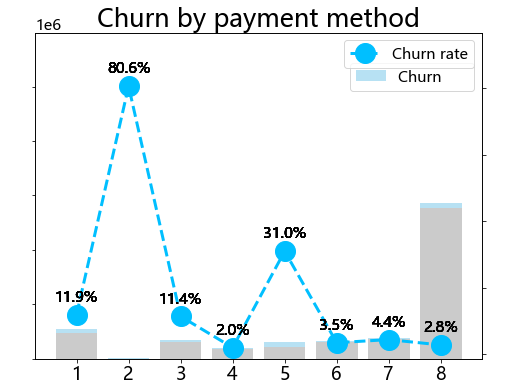

In [99]:
Column('payment_method_id','Churn by payment method','best',1,1,2,3,4,5,6,7,8)

1.0: 0.19 %
2.0: 0.17 %
3.0: 0.10 %
4.0: 0.07 %
5.0: 0.07 %
6.0: 0.07 %
7.0: 0.06 %
8.0: 0.05 %
9.0: 0.06 %
10.0: 0.08 %


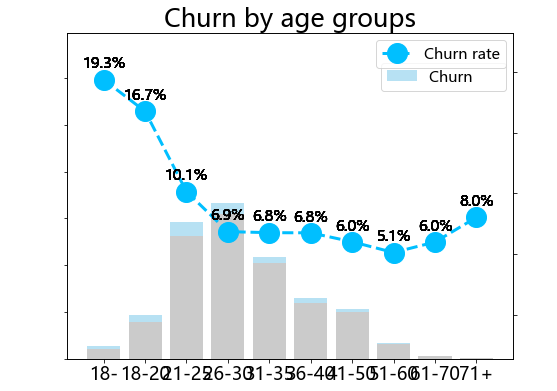

In [100]:
Column('Groupage','Churn by age groups','best',1,'18-', '18-20', '21-25', '26-30', '31-35', '36-40', '41-50', '51-60',
       '61-70', '71+')

1: 0.66 %
2: 0.14 %
3: 0.07 %
4: 0.05 %
5: 0.03 %
6: 0.02 %


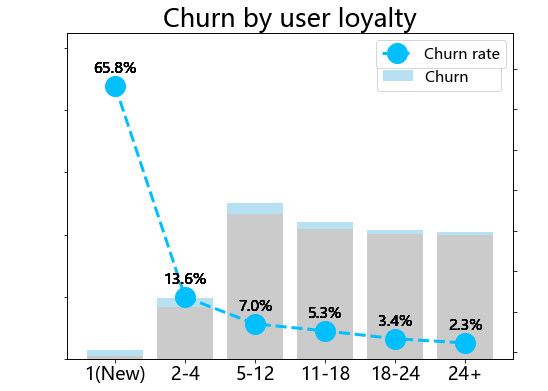

In [101]:
Column('user_level','Churn by user loyalty','best',0.99,'1(New)','2-4','5-12','11-18','18-24','24+')

In [102]:
df_All.user_level.value_counts()

3    249907
4    219918
5    207868
6    203713
2     97200
1     14325
Name: user_level, dtype: int64

In [103]:
df_All.columns

Index(['msno', 'is_churn', 'payment_method_id', 'payment_plan_days',
       'plan_list_price', 'actual_amount_paid', 'is_auto_renew',
       'transaction_date', 'membership_expire_date', 'is_cancel', 'DATE',
       't_times', 'totalcharges', 'user_level', 'contract', 'log_counts',
       'avg_unisongs_listened', 'avg_totalseconds', 'listening_rate',
       'secs_range', 'bd', 'gender', 'city', 'registered_via', 'Groupage',
       'planday_group'],
      dtype='object')

In [104]:
df_All.isnull().sum()

msno                           0
is_churn                       0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
DATE                           0
t_times                        0
totalcharges                   0
user_level                     0
contract                       0
log_counts                253142
avg_unisongs_listened     253142
avg_totalseconds          253142
listening_rate                 0
secs_range                253142
bd                        744613
gender                         0
city                      455485
registered_via            455485
Groupage                  744637
planday_group                  0
dtype: int64

In [105]:
print('Without listening records%%\n%.2f%%'%(df_All.secs_range.isnull().sum()/df_All.is_churn.count()))

Without listening records%
0.25%


In [106]:
print('Churn rate without listening records in month\n%.4f%%'%(df_All[df_All.secs_range.isnull()].is_churn.sum()/df_All[df_All.secs_range.isnull()].is_churn.count()))

Churn rate without listening records in month
0.1650%


In [107]:
df_All.head(20)

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,...,avg_unisongs_listened,avg_totalseconds,listening_rate,secs_range,bd,gender,city,registered_via,Groupage,planday_group
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,30,149,149,0,20170107,20170206,0,...,NaN,NaN,nan,NaN,36.0,female,18.0,9.0,6.0,2
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,6,30,149,149,1,20170224,20170321,1,...,1.0,282.0,1.0,1,NaN,No Data,NaN,NaN,NaN,2
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,6,30,149,149,1,20170112,20170203,1,...,NaN,NaN,nan,NaN,27.0,female,11.0,9.0,4.0,2
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,5,410,1788,1788,0,20160106,20170220,0,...,38.0,6592.0,0.7,4,NaN,No Data,NaN,NaN,NaN,3
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,5,30,149,149,0,20170128,20170227,0,...,44.0,10829.0,1.0,6,27.0,male,3.0,9.0,4.0,2
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,1,30,149,149,1,20170215,20170215,1,...,NaN,NaN,nan,NaN,23.0,female,6.0,9.0,3.0,2
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,3,30,180,180,0,20170109,20170208,0,...,NaN,NaN,nan,NaN,NaN,No Data,NaN,NaN,NaN,2
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,5,30,149,149,0,20170126,20170225,0,...,2.0,478.0,1.0,1,22.0,male,11.0,9.0,3.0,2
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,3,30,180,180,0,20170201,20170306,0,...,12.0,6746.0,1.0,4,22.0,female,18.0,9.0,3.0,2
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,5,30,149,149,0,20170123,20170222,0,...,11.0,3537.0,1.0,2,NaN,No Data,NaN,NaN,NaN,2


In [108]:
df_All=df_All.replace(np.nan,0)

In [109]:
for col in df_All.columns[-11:-1]:
 print(col)
 print(df_All[col].unique())

log_counts
[ 0.  1.  5. 17. 22.  3. 30. 26. 16. 14.  9.  6. 21. 13. 25. 28. 31. 19.
  7. 23.  4.  8. 15. 20.  2. 29. 10. 27. 18. 24. 11. 12.]
avg_unisongs_listened
[  0.   1.  38.  44.   2.  12.  11.  27.  23.  32.  25.  36.  22.   8.
  26.  14.  10.  61.  33.  35.  24.  65.  16.  53.  75.  20.  48.   6.
  29.  45.  21.  15.   7.  28.  47.  18.  50.  17.  19.  39.  84.  66.
  85.  95.   9.  56.   4.  13.  37.   3.  52.  51.  57.  78.  30.  80.
  49.  68.  31.  73.  54.   5.  64.  43.  86.  55. 100.  46.  62.  34.
  99.  59.  76. 127.  98.  60.  79.  97.  63.  82.  42.  83.  94.  40.
  41. 177. 123. 111.  70. 107.  58.  72.  88.  67. 115.  92. 119. 105.
  77.  87. 200.  93.  90.  81. 129.  69. 126. 162. 118.  89.  74. 113.
 108. 101. 102. 138. 106. 103. 151. 114. 235.  91.  96. 135.  71. 117.
 124. 131. 137. 110. 104. 122. 168. 109. 136. 128. 121. 144. 161. 134.
 182. 112. 152. 145. 148. 232. 140. 188. 139. 143. 142. 171. 141. 170.
 120. 125. 257. 207. 149. 174. 132. 164. 225. 169. 160.

In [110]:
df_All.isnull().sum()

msno                           0
is_churn                       0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
DATE                           0
t_times                        0
totalcharges                   0
user_level                     0
contract                       0
log_counts                     0
avg_unisongs_listened          0
avg_totalseconds               0
listening_rate                 0
secs_range                253142
bd                             0
gender                         0
city                           0
registered_via                 0
Groupage                       0
planday_group                  0
dtype: int64

In [111]:
df_All.listening_rate=df_All.listening_rate.replace('nan',0)

In [112]:
df_All.secs_range=df_All.secs_range.fillna(0)

In [113]:
df_Allml=df_All.drop(['bd','transaction_date','membership_expire_date','city','gender','log_counts',
                    't_times','avg_totalseconds','payment_plan_days','msno','avg_unisongs_listened','actual_amount_paid'],axis=1)

In [114]:
df_Allml.head(10)

,is_churn,payment_method_id,plan_list_price,is_auto_renew,is_cancel,DATE,totalcharges,user_level,contract,listening_rate,secs_range,registered_via,Groupage,planday_group
0,1,5,149,0,0,201702,149,2,1,0,0,9.0,6.0,2
1,1,6,149,1,1,201703,3309,5,0,1.0,1,0.0,0.0,2
2,1,6,149,1,1,201702,1492,3,1,0,0,9.0,4.0,2
3,1,5,1788,0,0,201702,1788,2,1,0.7,4,0.0,0.0,3
4,1,5,149,0,0,201702,3576,3,1,1.0,6,9.0,4.0,2
5,1,1,149,1,1,201702,2384,5,1,0,0,9.0,3.0,2
6,1,3,180,0,0,201702,1770,3,1,0,0,0.0,0.0,2
7,1,5,149,0,0,201702,3222,5,1,1.0,1,9.0,3.0,2
8,1,3,180,0,0,201703,3683,5,0,1.0,4,9.0,3.0,2
9,1,5,149,0,0,201702,596,3,1,1.0,2,0.0,0.0,2


### Machine Learning

In [116]:
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
df_All.columns
df_All=df_All.replace(np.nan,-1) 
X=df_Allml.drop(columns = ['is_churn','is_cancel','is_auto_renew'],axis=1)
y=df_Allml.is_churn

In [117]:
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [118]:
X.head(15)

,payment_method_id,plan_list_price,DATE,totalcharges,user_level,contract,listening_rate,secs_range,registered_via,Groupage,planday_group
0,0.571429,0.0745,0.999787,0.018307,0.2,1.0,0.0,0.000000,0.692308,0.6,0.5
1,0.714286,0.0745,1.000000,0.406561,0.8,0.0,1.0,0.166667,0.000000,0.0,0.5
2,0.714286,0.0745,0.999787,0.183315,0.4,1.0,0.0,0.000000,0.692308,0.4,0.5
3,0.571429,0.8940,0.999787,0.219683,0.2,1.0,0.7,0.666667,0.000000,0.0,1.0
4,0.571429,0.0745,0.999787,0.439366,0.4,1.0,1.0,1.000000,0.692308,0.4,0.5
5,0.000000,0.0745,0.999787,0.292911,0.8,1.0,0.0,0.000000,0.692308,0.3,0.5
6,0.285714,0.0900,0.999787,0.217471,0.4,1.0,0.0,0.000000,0.000000,0.0,0.5
7,0.571429,0.0745,0.999787,0.395872,0.8,1.0,1.0,0.166667,0.692308,0.3,0.5
8,0.285714,0.0900,1.000000,0.452513,0.8,0.0,1.0,0.666667,0.692308,0.3,0.5
9,0.571429,0.0745,0.999787,0.073228,0.4,1.0,1.0,0.333333,0.000000,0.0,0.5


In [119]:
logistic=linear_model.LogisticRegression()
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=100)

array([[<AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'DATE'}>],
       [<AxesSubplot:title={'center':'totalcharges'}>,
        <AxesSubplot:title={'center':'user_level'}>,
        <AxesSubplot:title={'center':'contract'}>],
       [<AxesSubplot:title={'center':'listening_rate'}>,
        <AxesSubplot:title={'center':'secs_range'}>,
        <AxesSubplot:title={'center':'registered_via'}>],
       [<AxesSubplot:title={'center':'Groupage'}>,
        <AxesSubplot:title={'center':'planday_group'}>, <AxesSubplot:>]],
      dtype=object)

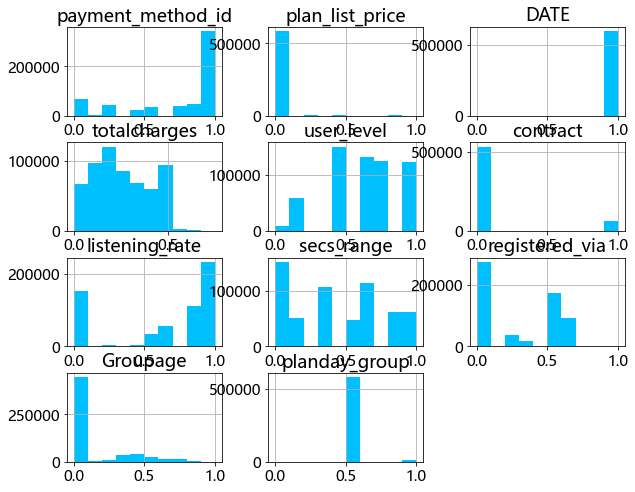

In [120]:
Xtrain.hist(color='deepskyblue',figsize=(10, 8))

array([[<AxesSubplot:title={'center':'payment_method_id'}>,
        <AxesSubplot:title={'center':'plan_list_price'}>,
        <AxesSubplot:title={'center':'DATE'}>],
       [<AxesSubplot:title={'center':'totalcharges'}>,
        <AxesSubplot:title={'center':'user_level'}>,
        <AxesSubplot:title={'center':'contract'}>],
       [<AxesSubplot:title={'center':'listening_rate'}>,
        <AxesSubplot:title={'center':'secs_range'}>,
        <AxesSubplot:title={'center':'registered_via'}>],
       [<AxesSubplot:title={'center':'Groupage'}>,
        <AxesSubplot:title={'center':'planday_group'}>, <AxesSubplot:>]],
      dtype=object)

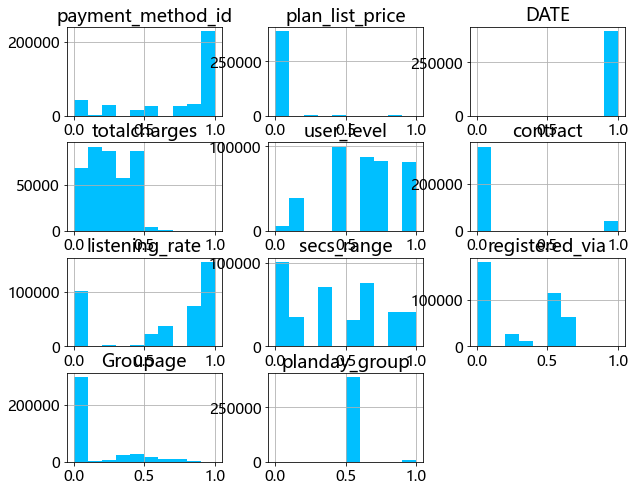

In [121]:
Xtest.hist(color='deepskyblue',figsize=(10, 8))

In [122]:
logistic.fit(Xtrain,ytrain)

LogisticRegression()

In [123]:
for i in range(len(Xtrain.columns)):
 print('coef of %s : %.8f'%(Xtrain.columns[i],logistic.coef_[0][i]))

coef of payment_method_id : -1.13876515
coef of plan_list_price : -0.50425810
coef of DATE : -0.02788801
coef of totalcharges : 5.63510357
coef of user_level : -3.14288920
coef of contract : 4.26235797
coef of listening_rate : -2.03088726
coef of secs_range : -1.05875721
coef of registered_via : -0.00091885
coef of Groupage : 0.54700893
coef of planday_group : -0.95127204


In [124]:
Xtrain.columns

Index(['payment_method_id', 'plan_list_price', 'DATE', 'totalcharges',
       'user_level', 'contract', 'listening_rate', 'secs_range',
       'registered_via', 'Groupage', 'planday_group'],
      dtype='object')

In [125]:
pred=logistic.predict(Xtest)
print('logistic Accuracy: ',logistic.score(Xtest,ytest))

logistic Accuracy:  0.9685754066867587


In [126]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
report = classification_report(ytest,pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    371740
           1       0.78      0.70      0.74     25433

    accuracy                           0.97    397173
   macro avg       0.88      0.84      0.86    397173
weighted avg       0.97      0.97      0.97    397173



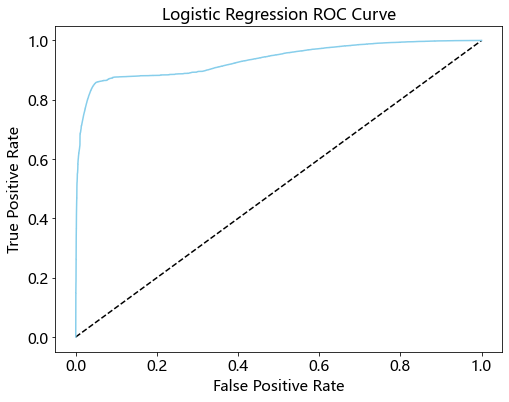

In [127]:
from sklearn.metrics import roc_curve
prob = logistic.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,prob)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "skyblue")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

In [128]:
#knn

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20) 
knn.fit(Xtrain,ytrain)
predicted_y = knn.predict(Xtest)
accuracy_knn = knn.score(Xtest,ytest)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.9746508448459488


In [ ]:
print(classification_report(ytest, predicted_y))

In [ ]:
df_T.transaction_date.describe()